In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import pandas as pd
from graph_trafic import Traffic

In [3]:
edge_list = [(0, 1, {'w': 2}),
             (1, 2, {'w': 2}),
             (2, 3, {'w': 2}),
             (3, 6, {'w': 2}),
             (1, 4, {'w': 2}),
             (4, 5, {'w': 2}),
             (5, 3, {'w': 2})]


In [10]:
G = Traffic(edge_list=edge_list, layout='spectral')

observations = []
total_reward = []
for i in range(30):
    state, reward, finished = G.step(refeed=True)
    observations.append(state)
    total_reward.append(reward)
    if finished:
        break

In [11]:
observations

[array([  1.,   8.,   7.,   2.,  10.,  11.,   6.,   6.]),
 array([  1.,   8.,   7.,   2.,  10.,   9.,   8.,   6.]),
 array([  1.,   8.,   7.,   2.,  10.,   7.,  10.,   6.]),
 array([  2.,   8.,   7.,   2.,  10.,   5.,  12.,   6.]),
 array([  3.,   8.,   7.,   2.,  10.,   3.,  14.,   6.]),
 array([  3.,   8.,   7.,   2.,  10.,   1.,  16.,   6.]),
 array([  3.,   8.,   7.,   2.,  10.,   0.,  17.,   6.]),
 array([  3.,   8.,   7.,   2.,  10.,   0.,  17.,   6.]),
 array([  3.,   8.,   7.,   2.,  10.,   0.,  17.,   6.]),
 array([  6.,   8.,   7.,   2.,  10.,   0.,  17.,   6.])]

In [12]:
total_reward

[-1, -1, -1, -1, -1, -1, -1, -1, -1, 20]

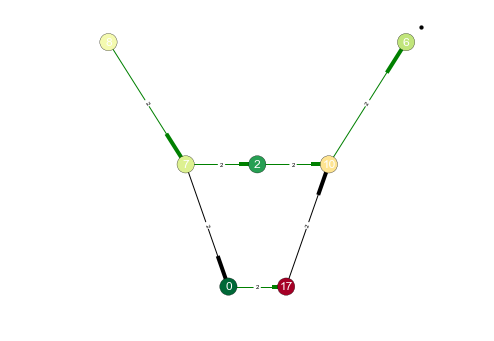

In [13]:
G.plot_graph()
plt.show()

# Emergency agent

The reward is computed on the car_1 traffic time. This agent will optimize the whole traffic for this car.

If car_1 is positioned on a node that accumulate cars, we need to open the next gate.

In [120]:
epochs = 10000
emergency_agent = []

for _ in range(epochs):
    G = Traffic(edge_list=edge_list)

    observations = []
    total_reward = 0
    previouspos = 0
    for i in range(30):
        state, reward, finished = G.step(refeed=True)
        observations.append(state)
        total_reward += (reward)

        car1 = int(state[0]) + 1
        obs = [x[car1] for x in observations[-3:]]
        if len(obs) > 2:
            blocked = all(x<y for x, y in zip(obs, obs[1:]))
            if (car1 != previouspos) and blocked:
                vector = np.ones_like(G.gates)
                G.action(vector)
                previouspos = car1
        if finished:
            break
    emergency_agent.append(total_reward)

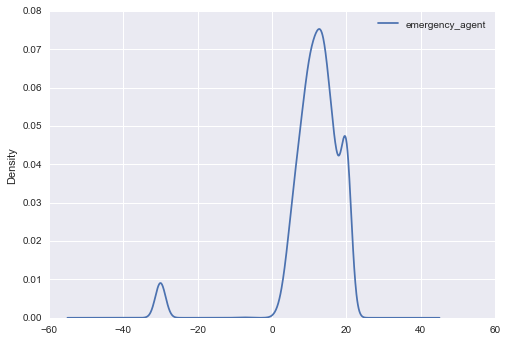

In [121]:
df = pd.DataFrame({'emergency_agent': emergency_agent
                  })
df.plot.kde()
plt.show()